The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. 
A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. 
Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r'Flight_Booking.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.shape

(300153, 12)

In [4]:
data = data.drop(columns = ['Unnamed: 0'])
data.shape

(300153, 11)

In [5]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [9]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

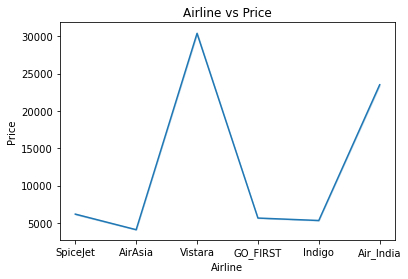

In [10]:
sns.lineplot(x=data['airline'], y=data['price'])
plt.title('Airline vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

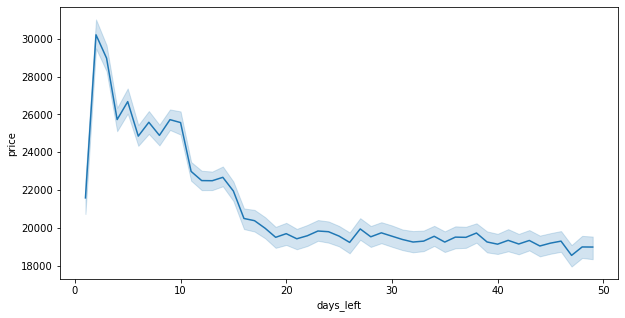

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data['days_left'], y=data['price'])
plt.show()

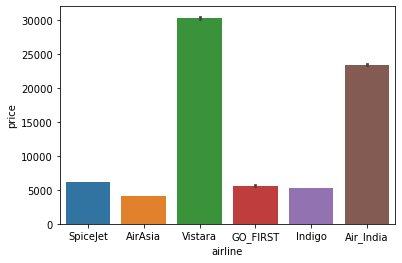

In [12]:
sns.barplot(x=data['airline'], y=data['price'])
plt.show()

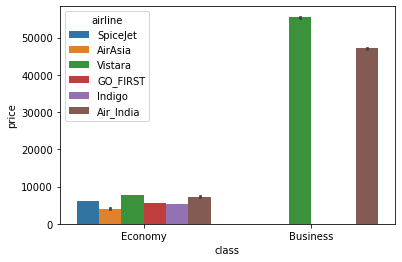

In [13]:
sns.barplot(x=data['class'], y=data['price'], hue=data['airline'])
plt.show()

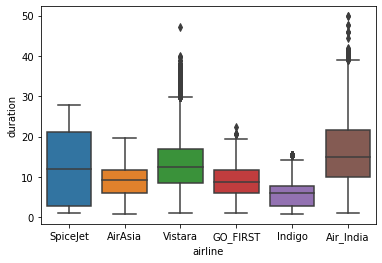

In [14]:
sns.boxplot(x=data['airline'], y=data['duration'])
plt.show()

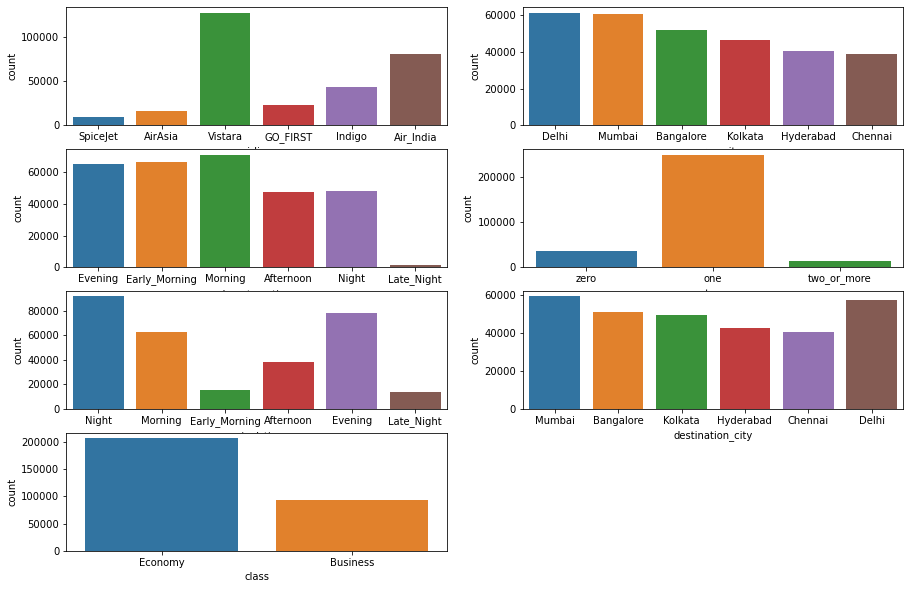

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(4,2,1)
sns.countplot(x = 'airline' , data=data)

plt.subplot(4,2,2)
sns.countplot(x = 'source_city' , data=data)

plt.subplot(4,2,3)
sns.countplot(x = 'departure_time' , data=data)

plt.subplot(4,2,4)
sns.countplot(x = 'stops' , data=data)

plt.subplot(4,2,5)
sns.countplot(x = 'arrival_time' , data=data)

plt.subplot(4,2,6)
sns.countplot(x = 'destination_city' , data=data)

plt.subplot(4,2,7)
sns.countplot(x = 'class' , data=data)

plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [17]:
data['airline'] = le.fit_transform(data['airline'])
data['departure_time'] = le.fit_transform(data['departure_time'])
data['source_city'] = le.fit_transform(data['source_city'])
data['stops'] = le.fit_transform(data['stops'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['class'] = le.fit_transform(data['class'])

In [18]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


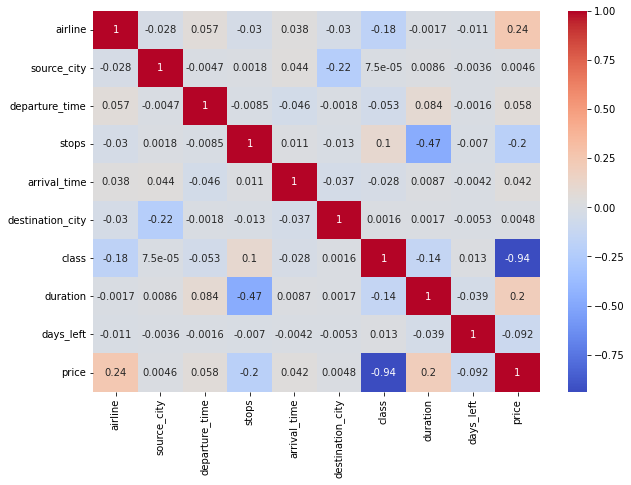

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [20]:
col = list(data.columns)
col

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in data.columns:
    if((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = data[col_list] 

vifdata = pd.DataFrame()
vifdata['Feature'] = X.columns
vifdata['VIF value'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vifdata)

            Feature  VIF value
0           airline   3.393124
1       source_city   2.927766
2    departure_time   2.779427
3             stops   1.426614
4      arrival_time   3.684550
5  destination_city   2.885337
6             class   2.849370
7          duration   4.113876
8         days_left   3.976790


In [22]:
data= data.drop(columns=['flight'])

data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [23]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [24]:
x = data.drop(columns = ['price'])
y = data['price']

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 32)


In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240122, 9)
(60031, 9)
(240122,)
(60031,)


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
pred

array([ 9653.97279424,  9309.02628168, 51753.96129665, ...,
       10240.38451323,  2670.39439487, 11481.55032707])

In [28]:
Error_pred = pd.DataFrame(columns = {'Actual_y' , 'Predicted_y' , })
Error_pred['Actual_y'] = y_test
Error_pred['Predicted_y'] = pred

print(Error_pred)

        Actual_y   Predicted_y
78540       8306   9653.972794
84740      10744   9309.026282
265436     70543  51753.961297
203927      3923   8541.410053
50067       7576   8460.315476
...          ...           ...
110333      7813  10726.891974
127798      8605   9952.960739
54279      16137  10240.384513
187149      3234   2670.394395
111554      5322  11481.550327

[60031 rows x 2 columns]


In [29]:
Error_pred['Difference'] = Error_pred['Actual_y'] - Error_pred['Predicted_y']
Error_pred.head()

,Actual_y,Predicted_y,Difference
78540,8306,9653.972794,-1347.972794
84740,10744,9309.026282,1434.973718
265436,70543,51753.961297,18789.038703
203927,3923,8541.410053,-4618.410053
50067,7576,8460.315476,-884.315476


In [30]:
from sklearn import metrics


In [31]:
r2 = metrics.r2_score(y_test , pred)
mae = metrics.mean_absolute_error(y_test , pred)
mape = metrics.mean_absolute_percentage_error(y_test , pred)
mse = metrics.mean_squared_error(y_test , pred)
rmse = np.sqrt(mse)



In [32]:
print(r2)
print(mae)
print(mape)
print(mse)
print(rmse)

0.9052189074581094
4627.277866272506
0.43733488545780363
48739205.40280789
6981.346961927038


C:\Users\Sravanthi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sravanthi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


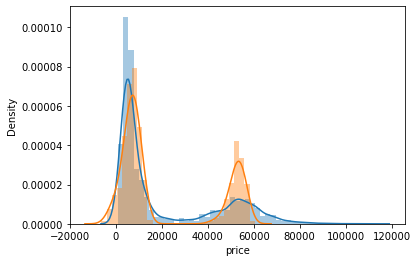

In [33]:
sns.distplot(y_test , label = 'Actual')
sns.distplot(pred , label = 'Predicted')
plt.show()

In [35]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)
pred_dt = dt.predict(x_test)
pred_dt

array([ 8043., 10744., 62591., ..., 16137.,  3234.,  5322.])

In [40]:
mape = metrics.mean_absolute_percentage_error(y_test , pred_dt)
mse = metrics.mean_squared_error(y_test , pred_dt)
rmse = np.sqrt(mse)


In [41]:
print(mape)
print(rmse)

0.07402532412638418
3453.3533680546925


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train , y_train)
pred_rf = rf.predict(x_test)
pred_rf

array([ 8348.49, 10668.31, 64602.61, ..., 15796.54,  3351.07,  5670.27])

In [46]:
mape = metrics.mean_absolute_percentage_error(y_test , pred_rf)
mse = metrics.mean_squared_error(y_test , pred_rf)
rmse = np.sqrt(mse)

In [47]:
print(mape)
print(rmse)

0.071015352651426
2766.3036203855913


In [ ]:
## Lower the RMSE and MAPE value, better is the model. 